# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import time as time

# Paramètres

In [2]:
ksch = 2  # Choix du schema 1 5pts, 2 9pts
N = 33  # Taille du maillage

h = 1. / (N - 1)  # Pas d'espace
nitermax = 10000  #  nombre maxi d'iteration de jacobi
restab = np.zeros(nitermax)
errtab = np.zeros(nitermax)

pi = np.pi

# Generation du maillage

In [3]:
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)

# La solution exacte

In [4]:
Te = np.zeros([N, N])
for i in range(0, N):
    for j in range(0, N):
        Te[i, j] = (1 / np.sinh(np.pi)) * (
                np.sinh(np.pi * x[i]) * np.sin(np.pi * y[j]) + np.sin(np.pi * x[i]) * np.sinh(np.pi * y[j]))

# Conditions aux limites

In [5]:
T = np.zeros([N, N])
#  (valeurs imposees en debut de calcul)
T[0, :] = 0.
T[:, 0] = 0.
for i in range(0, N):
    T[N-1, i] = np.sin(pi*y[i])
    T[i, N-1] = np.sin(pi*x[i])

# Itérations de Jacobi

In [6]:
debtime = time.time() # temps de l'horloge au début du calcul, pour mesure du temps d'exécution
niter = 0  #  compteur nombre d'iterations
res = 1.  #  residu

while res > 1.0E-16 and niter < nitermax :  # on continu les iterations tant que le residu est trop grand
    #  stockage du du niveau N+1 au niveau N
    U = np.copy(T)  # multiplication par "1" pour forcer une copie, sinon U et T deviendraient synonymes
    if ksch == 1:
        #  methode de jacobi a 5 Pts
        for i in range(1, N-1):
            for j in range(1, N-1):
                T[i, j] = 0.25*(U[i+1, j] + U[i-1, j] + U[i, j+1] + U[i, j-1])

    if ksch == 2:
        #  methode de jacobi a 9 pts
        for i in range(1, N - 1):
            for j in range(1, N - 1):
                # a modifier pour passer à 9 pts
                T[i, j] = 0.2*(U[i + 1, j] + U[i - 1, j] + U[i, j + 1] + U[i, j - 1]) + 0.05*(U[i + 1, j+1] + U[i - 1, j+1] + U[i+1, j - 1] + U[i-1, j - 1])

    # Calcul du residu en norme L2 - écart entre deux solutions successives
    res = np.linalg.norm(T-U)/N
    restab[niter-1] = np.log10(res)

    # calcul de l'erreur en norme L2 - écart vs. solution exacte
    erreur = np.linalg.norm(T-Te)/N
    errtab[niter - 1] = np.log10(erreur)
    
    niter = niter+1


fintime = time.time() # temps de l'horloge en fin de calcul

print("nombre d'iterations", niter)
print("temps cpu", fintime-debtime)
print("log10 de l'erreur", np.log10(erreur))
print("log10 du pas", np.log10(h))

nombre d'iterations 5287
temps cpu 14.299469709396362
log10 de l'erreur -10.327453618158863
log10 du pas -1.505149978319906


# Graphiques

## Erreur

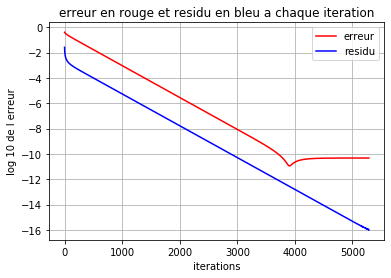

In [7]:
numiter = range(niter-1)

fig = plot.figure()
plot.plot(numiter, errtab[0:niter-1], 'r', label="erreur")
plot.plot(numiter, restab[0:niter-1], 'b-', label="residu")
plot.title("erreur en rouge et residu en bleu a chaque iteration")
plot.xlabel('iterations')
plot.ylabel('log 10 de l erreur')
plot.legend()
plot.grid()

## Graphique contours en 2D

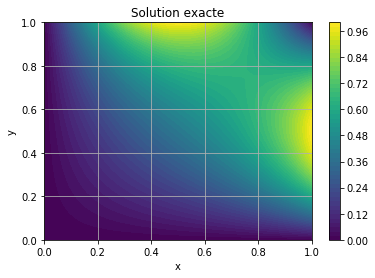

In [8]:
fig = plot.figure()
X, Y = np.meshgrid(x, y)
plot.contourf(X, Y, Te, 50)
plot.colorbar()
plot.title('Solution exacte')
plot.xlabel('x')
plot.ylabel('y')
plot.grid()
#fig.show()
plot.savefig('myfig.png', dpi=300)

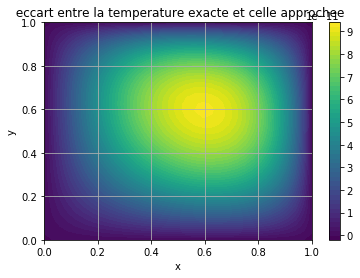

In [9]:
fig = plot.figure()
X, Y = np.meshgrid(x, y)
plot.contourf(X, Y, T- Te, 50)
plot.colorbar()
plot.title(' eccart entre la temperature exacte et celle approchee')
plot.xlabel('x')
plot.ylabel('y')
plot.grid()
#fig.show()
plot.savefig('myfig.png', dpi=300)

## Graphique en 3D

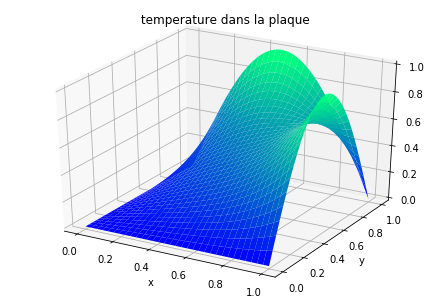

In [10]:
from matplotlib import cm

fig3d = plot.figure()


from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(fig3d)  # erreur avec python 2.7
ax.plot_surface(X, Y, T, rstride=1, cstride=1, cmap=cm.winter)
plot.title(' temperature dans la plaque')
plot.xlabel('x')
plot.ylabel('y')

plot.show()

# Ordre de schema

In [11]:
from scipy import stats

In [12]:
vector_h = [1./8., 1./16., 1./24., 1./32.]
vector_log10error_5points = [-2.432586973010995, -3.005489848760658, -3.3491292998568243, -3.5966857327717956]
vector_log10error_9points = [-6.7530342106755405, -8.534142839057125, -9.582087449052079, -10.327453618158863]

In [13]:
result_lin_fit_5points = stats.linregress(np.log10(vector_h), vector_log10error_5points)

print('slope = ', result_lin_fit_5points[0])
print('intercept = ', result_lin_fit_5points[1])

slope =  1.9316304971063305
intercept =  -0.6850222713602871


In [14]:
result_lin_fit_9points = stats.linregress(np.log10(vector_h), vector_log10error_9points)

print('slope = ', result_lin_fit_9points[0])
print('intercept = ', result_lin_fit_9points[1])

slope =  5.935965957668877
intercept =  -1.3902463734420998


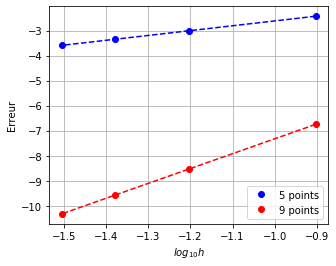

In [18]:
fig, ax = plot.subplots(nrows=1, ncols=1, figsize=(5,4))
ax.plot(np.log10(vector_h), vector_log10error_5points, 'o', color='blue', label='5 points')
ax.plot(np.log10(vector_h), vector_log10error_9points, 'o', color='red', label='9 points')
ax.plot(np.log10(vector_h), result_lin_fit_5points[1] + result_lin_fit_5points[0]*np.log10(vector_h), '--', color='blue')
ax.plot(np.log10(vector_h), result_lin_fit_9points[1] + result_lin_fit_9points[0]*np.log10(vector_h), '--', color='red')
ax.set(xlabel=r'$log_{10} h$', ylabel='Erreur'); ax.grid()
ax.legend()
plot.show()